# Machine Learning - Comparison Models 
- Random Forest                   
- Logistic Regression              
- Tree Classifier      
- Support-Vector Machine(SVM)   
- Gradient Boosting Classifier (GBC)
- Kmeans
- Naive Bayes    

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import pandas as pd

location = '../input/iris/Iris.csv'
iris_dataset = pd.read_csv(location)
iris_dataset.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


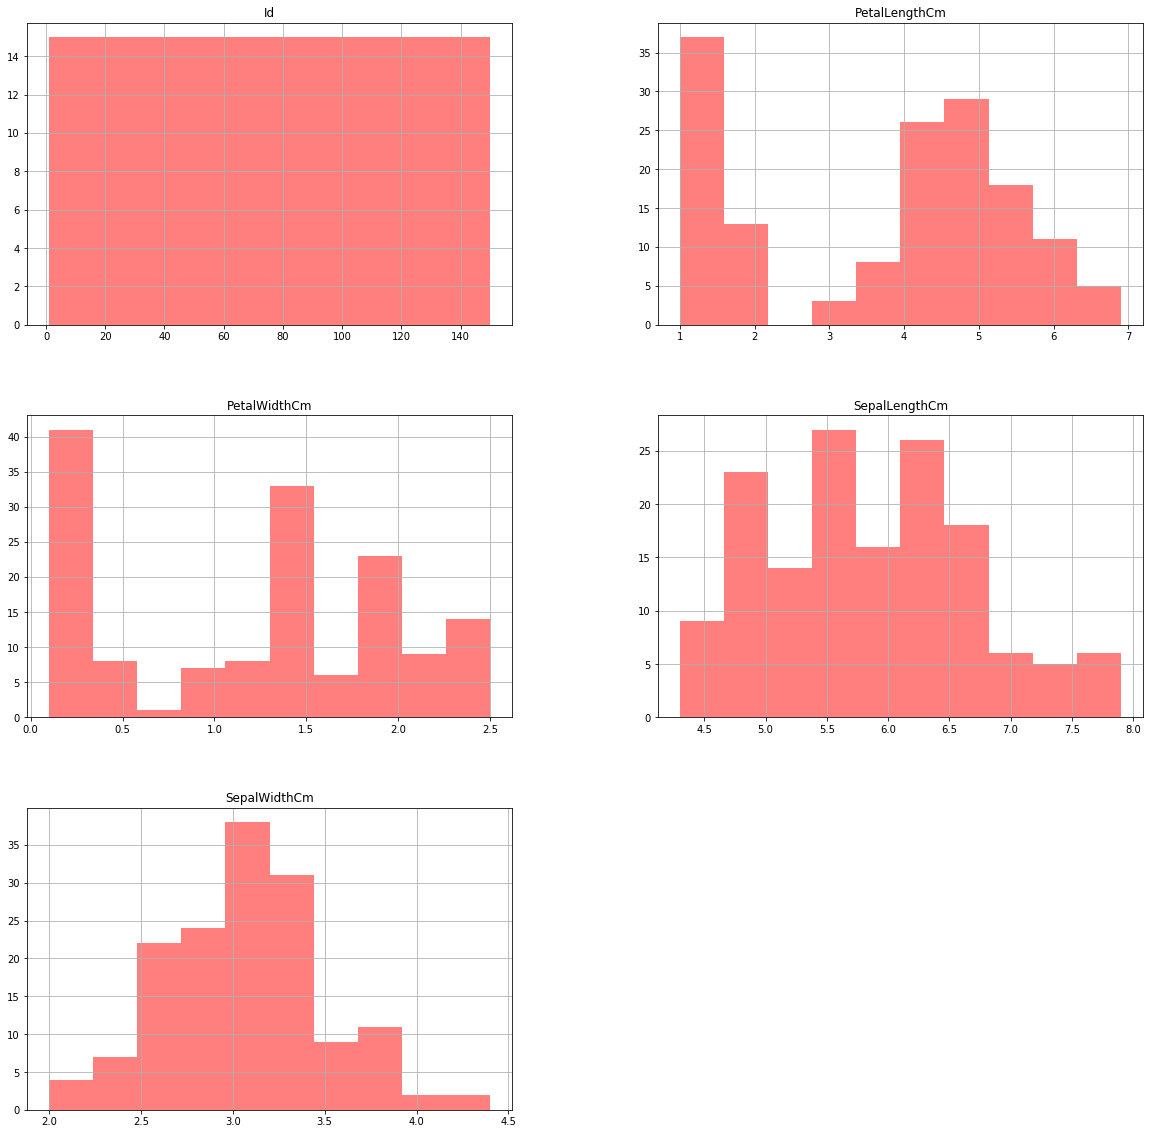

In [3]:
iris_dataset.hist(alpha=0.5, figsize=(20, 20), color='red')
plt.show()

In [4]:
#separating elements
columns = list(iris_dataset.columns)
X = iris_dataset[[columns[1], columns[2], columns[3], columns[4]]]
y = iris_dataset[columns[5]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [5]:
def machine_learning_algorithms(X, y):
    train_X = X
    train_y = y
    
    modelForest = RandomForestClassifier(n_estimators=100)
    modelForest.fit( train_X , train_y)
    
    modelLogistic = LogisticRegression()
    modelLogistic.fit(train_X , train_y)
    
    modeltrees = ExtraTreesClassifier(n_estimators=100)
    modeltrees.fit(train_X , train_y)
    
    modelSVC = SVC()
    modelSVC.fit(train_X , train_y)

    modelgbc = GradientBoostingClassifier()
    modelgbc.fit( train_X , train_y)
    
    modelKNN = KNeighborsClassifier(n_neighbors = 3)
    modelKNN.fit( train_X , train_y)
    
    modelGaussian = GaussianNB()
    modelGaussian.fit(train_X , train_y)

    models = [modelForest, modelLogistic, modeltrees, modelSVC, modelgbc, modelKNN, modelGaussian]
    
    return models

np.random.seed(1000)
algorithm = machine_learning_algorithms(X_train, y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
columns = ['RandomForest', 'Logistic Regression', 'Tree Classifier', 'SVC', 'GBC', 'KMeans', 'N. Bayes']
scores_train = []
scores_test = []
for k in range(0, 7):
    scores_train.append(algorithm[k].score(X_train, y_train))
    scores_test.append(algorithm[k].score(X_test, y_test))
                
RandomForest = 'Train:{}  Test:{}'.format("%.4f" % scores_train[0], "%.4f" % scores_test[0])
LogisticRegr = 'Train:{}  Test:{}'.format("%.4f" % scores_train[1], "%.4f" % scores_test[1])
TreeClassifier = 'Train:{}  Test:{}'.format("%.4f" % scores_train[2], "%.4f" % scores_test[2])
SVC = 'Train:{}  Test:{}'.format("%.4f" % scores_train[3], "%.4f" % scores_test[3])
GBC = 'Train:{}  Test:{}'.format("%.4f" % scores_train[4], "%.4f" % scores_test[4])
Kmeans = 'Train:{}  Test:{}'.format("%.4f" % scores_train[5], "%.4f" % scores_test[5])
NBayes = 'Train:{}  Test:{}'.format("%.4f" % scores_train[6], "%.4f" % scores_test[6])

In [7]:
print("Random Forest                     :", RandomForest) 
print("Logistic Regression               :", LogisticRegr)
print("Tree Classifier                   :", TreeClassifier)
print("Support-Vector Machine(SVM)       :", SVC)
print("Gradient Boosting Classifier (GBC):", GBC)
print("KMeans                            :", Kmeans)
print("Naive Bayes                       :", NBayes)

Random Forest                     : Train:1.0000  Test:0.9111
Logistic Regression               : Train:0.9524  Test:0.9111
Tree Classifier                   : Train:1.0000  Test:0.9111
Support-Vector Machine(SVM)       : Train:0.9810  Test:0.9778
Gradient Boosting Classifier (GBC): Train:1.0000  Test:0.9111
KMeans                            : Train:0.9714  Test:0.9333
Naive Bayes                       : Train:0.9810  Test:0.9111


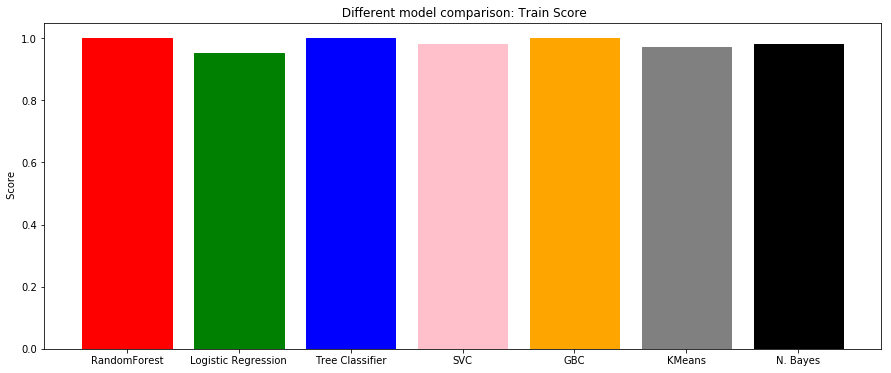

In [8]:
plt.figure(figsize=(15,6))
plt.title(' Different model comparison: Train Score')
plt.ylabel(' Score')
bar = plt.bar(columns, scores_train)
bar[0].set_color('red')
bar[1].set_color('green')
bar[2].set_color('blue')
bar[3].set_color('pink')
bar[4].set_color('orange')
bar[5].set_color('gray')
bar[6].set_color('black')

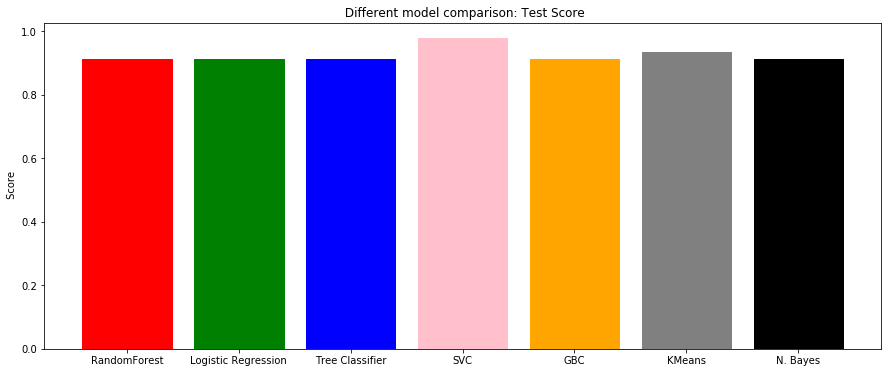

In [9]:
plt.figure(figsize=(15,6))
plt.title(' Different model comparison: Test Score')
plt.ylabel(' Score')
bar = plt.bar(columns, scores_test)
bar[0].set_color('red')
bar[1].set_color('green')
bar[2].set_color('blue')
bar[3].set_color('pink')
bar[4].set_color('orange')
bar[5].set_color('gray')
bar[6].set_color('black')